In [272]:
import os
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.primitives.ciphers import Cipher
from cryptography.hazmat.primitives.ciphers.algorithms import AES
from cryptography.hazmat.primitives.ciphers.modes import ECB, CBC, CTR
from PIL import Image
import numpy as np
import time
from tqdm import tqdm
import copy
from random import randrange
from IPython.display import Image as show_image

# Przykład

In [2]:
plaintext = b'Fundamental Cryptography in Python'
print(f"Plaintext ({len(plaintext)}): {plaintext}")

Plaintext (34): b'Fundamental Cryptography in Python'


In [3]:
# 256-bit symmetric key
key = os.urandom(32)
print(key)
print(len(key))

b'\x88\x8b\xedbN\xd6\x895\xc2n\xd5L\\\x0f"Q\xdc\xf4\xc0i\x1b,U\x17\xbc\xf4\x1b\x88>\xbfG\xaf'
32


In [4]:
# AES ECB cipher
aes_ecb_cipher = Cipher(AES(key), ECB())

In [5]:
# Encrypt without padding
ciphertext = aes_ecb_cipher.encryptor().update(plaintext)
print(f"Ciphertext (no padding) ({len(ciphertext)}): {ciphertext}")

Ciphertext (no padding) (32): b'6l\xc1\xc7V\x1b\xc5\xe7\xa3ADq\x98_\x15Xh\x84\xe4\xe3\\\xd0y9W\xdc\x00\xd5b\x18\xf5\x80'


In [6]:
# Decrypt without padding
recovered_plaintext = aes_ecb_cipher.decryptor().update(ciphertext)
print(f"Recovered plaintext (no padding) ({len(recovered_plaintext)}): {recovered_plaintext}")

Recovered plaintext (no padding) (32): b'Fundamental Cryptography in Pyth'


In [7]:
# Pad the plaintext
aes_block_size_in_bits = 128
pkcs7_padder = padding.PKCS7(aes_block_size_in_bits).padder()
padded_plaintext = pkcs7_padder.update(plaintext) + pkcs7_padder.finalize()
print(f"Padded plaintext: {padded_plaintext}")

Padded plaintext: b'Fundamental Cryptography in Python\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e'


In [8]:
# Encrypt with padding
ciphertext = aes_ecb_cipher.encryptor().update(padded_plaintext)
print(f"Ciphertext ({len(ciphertext)}): {ciphertext}")

Ciphertext (48): b'6l\xc1\xc7V\x1b\xc5\xe7\xa3ADq\x98_\x15Xh\x84\xe4\xe3\\\xd0y9W\xdc\x00\xd5b\x18\xf5\x80\x87:\xa4\xf8\xac\xcb\x98\xcd+\xa4R+\xa1\xcd\xf7\x88'


In [9]:
# Decrypt with padding
recovered_plaintext_with_padding = aes_ecb_cipher.decryptor().update(ciphertext)
print(f"Recovered plaintext + padding: {recovered_plaintext_with_padding}")

Recovered plaintext + padding: b'Fundamental Cryptography in Python\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e'


In [10]:
pkcs7_unpadder = padding.PKCS7(aes_block_size_in_bits).unpadder()
recovered_plaintext = pkcs7_unpadder.update(recovered_plaintext_with_padding) + pkcs7_unpadder.finalize()
print(f"Recovered plaintext: {recovered_plaintext}")
assert (plaintext == recovered_plaintext)

Recovered plaintext: b'Fundamental Cryptography in Python'


# Zadania

In [35]:
img_data = np.array(Image.open('data/1mb.png').convert('RGBA'))
im1mb = img_data.tobytes()
im5mb = np.array(Image.open('data/5mb.png').convert('RGBA')).tobytes()
im10mb = np.array(Image.open('data/10mb.png').convert('RGBA')).tobytes()

In [36]:
im1mb[0:100]

b'\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00\xff\xff\xff\x00'

In [95]:
aes_block_size_in_bits = 128
aes_block_size_in_bytes = aes_block_size_in_bits // 8
key = os.urandom(32)
print(key)
print(len(key))

b"\xa7\xd40\xfdS\x10<\xfd\xf6\xf4\xb6\xc4\xb5\x1a\xc2'\x1bn\xcb0F\xb5\x99XS\x97\xe6\xf2\x8b\x00\xe3\xa3"
32


In [96]:
pkcs7_padder = padding.PKCS7(aes_block_size_in_bits).padder()
im1mb_padded = pkcs7_padder.update(im1mb) + pkcs7_padder.finalize()
pkcs7_padder = padding.PKCS7(aes_block_size_in_bits).padder()
im5mb_padded = pkcs7_padder.update(im5mb) + pkcs7_padder.finalize()
pkcs7_padder = padding.PKCS7(aes_block_size_in_bits).padder()
im10mb_padded = pkcs7_padder.update(im10mb) + pkcs7_padder.finalize()

In [97]:
if not os.path.isdir('results'):
    os.mkdir('results')

In [98]:
num_of_measurements = 50

In [41]:
def save_img(path, image_array):
    img = Image.fromarray(image_array, 'RGBA')
    img.save(path)

In [263]:
def measure_enc_time(enc_method):
    total_1mb_enc_times = np.zeros(num_of_measurements)
    total_5mb_enc_times = np.zeros(num_of_measurements)
    total_10mb_enc_times = np.zeros(num_of_measurements)
    
    for i in tqdm(range(num_of_measurements)):
        start = time.time()
        cipherdata_1mb = enc_method(im1mb_padded)
        stop = time.time()
        total_1mb_enc_times[i] = stop - start
        
        start = time.time()
        cipherdata_5mb = enc_method(im5mb_padded)
        stop = time.time()
        total_5mb_enc_times[i] = stop - start
        
        start = time.time()
        cipherdata_10mb = enc_method(im10mb_padded)
        stop = time.time()
        total_10mb_enc_times[i] = stop - start
    
    print(f"For 1mb.png, mean = {total_1mb_enc_times.mean():.4f}s, var = {total_1mb_enc_times.var():.4f}s, median = {np.median(total_1mb_enc_times):.4f}s")
    print(f"For 5mb.png, mean = {total_5mb_enc_times.mean():.4f}s, var = {total_5mb_enc_times.var():.4f}s, median = {np.median(total_5mb_enc_times):.4f}s")
    print(f"For 10mb.png, mean = {total_10mb_enc_times.mean():.4f}s, var = {total_10mb_enc_times.var():.4f}s, median = {np.median(total_10mb_enc_times):.4f}s")
    return cipherdata_1mb, cipherdata_5mb, cipherdata_10mb

In [264]:
def measure_dec_time(dec_method, cipherdata_1mb, cipherdata_5mb, cipherdata_10mb):
    # mierzę czysty czas deszyfrowania bez usuwania paddingu
    total_1mb_dec_times = np.zeros(num_of_measurements)
    total_5mb_dec_times = np.zeros(num_of_measurements)
    total_10mb_dec_times = np.zeros(num_of_measurements)
    
    for i in tqdm(range(num_of_measurements)):
        start = time.time()
        image_data_1mb = dec_method(cipherdata_1mb)
        stop = time.time()
        total_1mb_dec_times[i] = stop - start
        
        start = time.time()
        image_data_5mb = dec_method(cipherdata_5mb)
        stop = time.time()
        total_5mb_dec_times[i] = stop - start
        
        start = time.time()
        image_data_10mb = dec_method(cipherdata_10mb)
        stop = time.time()
        total_10mb_dec_times[i] = stop - start
    
    assert(image_data_1mb == im1mb_padded)
    assert(image_data_5mb == im5mb_padded)
    assert(image_data_10mb == im10mb_padded)
    
    print(f"For 1mb.png, mean = {total_1mb_dec_times.mean():.4f}s, var = {total_1mb_dec_times.var():.4f}s, median = {np.median(total_1mb_dec_times):.4f}s")
    print(f"For 5mb.png, mean = {total_5mb_dec_times.mean():.4f}s, var = {total_5mb_dec_times.var():.4f}s, median = {np.median(total_5mb_dec_times):.4f}s")
    print(f"For 10mb.png, mean = {total_10mb_dec_times.mean():.4f}s, var = {total_10mb_dec_times.var():.4f}s, median = {np.median(total_10mb_dec_times):.4f}s")

In [274]:
def decrypt_image(image_cipherdata, decrypt_method):
    decrypted_img_padded = decrypt_method(image_cipherdata)
    pkcs7_unpadder = padding.PKCS7(aes_block_size_in_bits).unpadder()
    decrypted_img = pkcs7_unpadder.update(decrypted_img_padded) + pkcs7_unpadder.finalize()
    return np.frombuffer(decrypted_img, dtype=np.uint8)[:img_data.size].reshape(img_data.shape)

In [248]:
def corrupt_cipherdata(cipherdata, num_of_changes=1):
    cipherdata_corrupted = bytearray(copy.copy(cipherdata))
    assert cipherdata_corrupted == cipherdata
    old_size = len(cipherdata_corrupted)
    for i in tqdm(range(num_of_changes)):
        random_pos = randrange(len(cipherdata_corrupted) // 2)
        cipherdata_corrupted[random_pos] = cipherdata_corrupted[random_pos+1]
    new_size = len(cipherdata_corrupted)
    assert old_size == new_size
    assert cipherdata_corrupted != cipherdata
    return cipherdata_corrupted

## ECB

In [42]:
if not os.path.isdir('results/ecb'):
    os.mkdir('results/ecb')

In [99]:
# AES ECB cipher
aes_ecb_cipher = Cipher(AES(key), ECB())

In [275]:
# Encrypt with padding
cipherdata_1mb = aes_ecb_cipher.encryptor().update(im1mb_padded)

In [276]:
# Encrypt with padding
cipherdata_5mb = aes_ecb_cipher.encryptor().update(im5mb_padded)

In [277]:
# Encrypt with padding
cipherdata_10mb = aes_ecb_cipher.encryptor().update(im10mb_padded)

In [194]:
len(cipherdata_1mb)

34560016

In [195]:
encrypted_img_data = np.frombuffer(cipherdata_1mb, dtype=np.uint8)[:img_data.size].reshape(img_data.shape)

In [196]:
encrypted_img = Image.fromarray(encrypted_img_data, 'RGBA')
encrypted_img.save('results/ecb/1mb.png')

### Pomiar czasu szyfrowania ECB

In [265]:
cipherdata_1mb, cipherdata_5mb, cipherdata_10mb = measure_enc_time(lambda data: aes_ecb_cipher.encryptor().update(data))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:24<00:00,  2.06it/s]

For 1mb.png, mean = 0.0176s, var = 0.0000s, median = 0.0171s
For 5mb.png, mean = 0.1347s, var = 0.0001s, median = 0.1328s
For 10mb.png, mean = 0.3317s, var = 0.0003s, median = 0.3300s


### Pomiar czasu deszyfrowania ECB

In [266]:
measure_dec_time(lambda data: aes_ecb_cipher.decryptor().update(data), cipherdata_1mb, cipherdata_5mb, cipherdata_10mb)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:23<00:00,  2.09it/s]

For 1mb.png, mean = 0.0174s, var = 0.0000s, median = 0.0171s
For 5mb.png, mean = 0.1314s, var = 0.0000s, median = 0.1306s
For 10mb.png, mean = 0.3289s, var = 0.0002s, median = 0.3245s


In [198]:
if not os.path.isdir('results/error_prop'):
    os.mkdir('results/error_prop')
if not os.path.isdir('results/error_prop/ecb'):
    os.mkdir('results/error_prop/ecb')

In [278]:
decrypted_1b = decrypt_image(cipherdata_1mb, lambda data: aes_ecb_cipher.decryptor().update(data))

In [279]:
save_img('results/error_prop/ecb/1mb.png', decrypted_1b)

### Błąd w szyfrogramie

In [280]:
cipherdata_1mb_corrupted = corrupt_cipherdata(cipherdata_1mb)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


In [281]:
decrypted_1b_corrupted = decrypt_image(cipherdata_1mb_corrupted, lambda data: aes_ecb_cipher.decryptor().update(data))
save_img('results/error_prop/ecb/1mb_corrupted.png', decrypted_1b_corrupted)

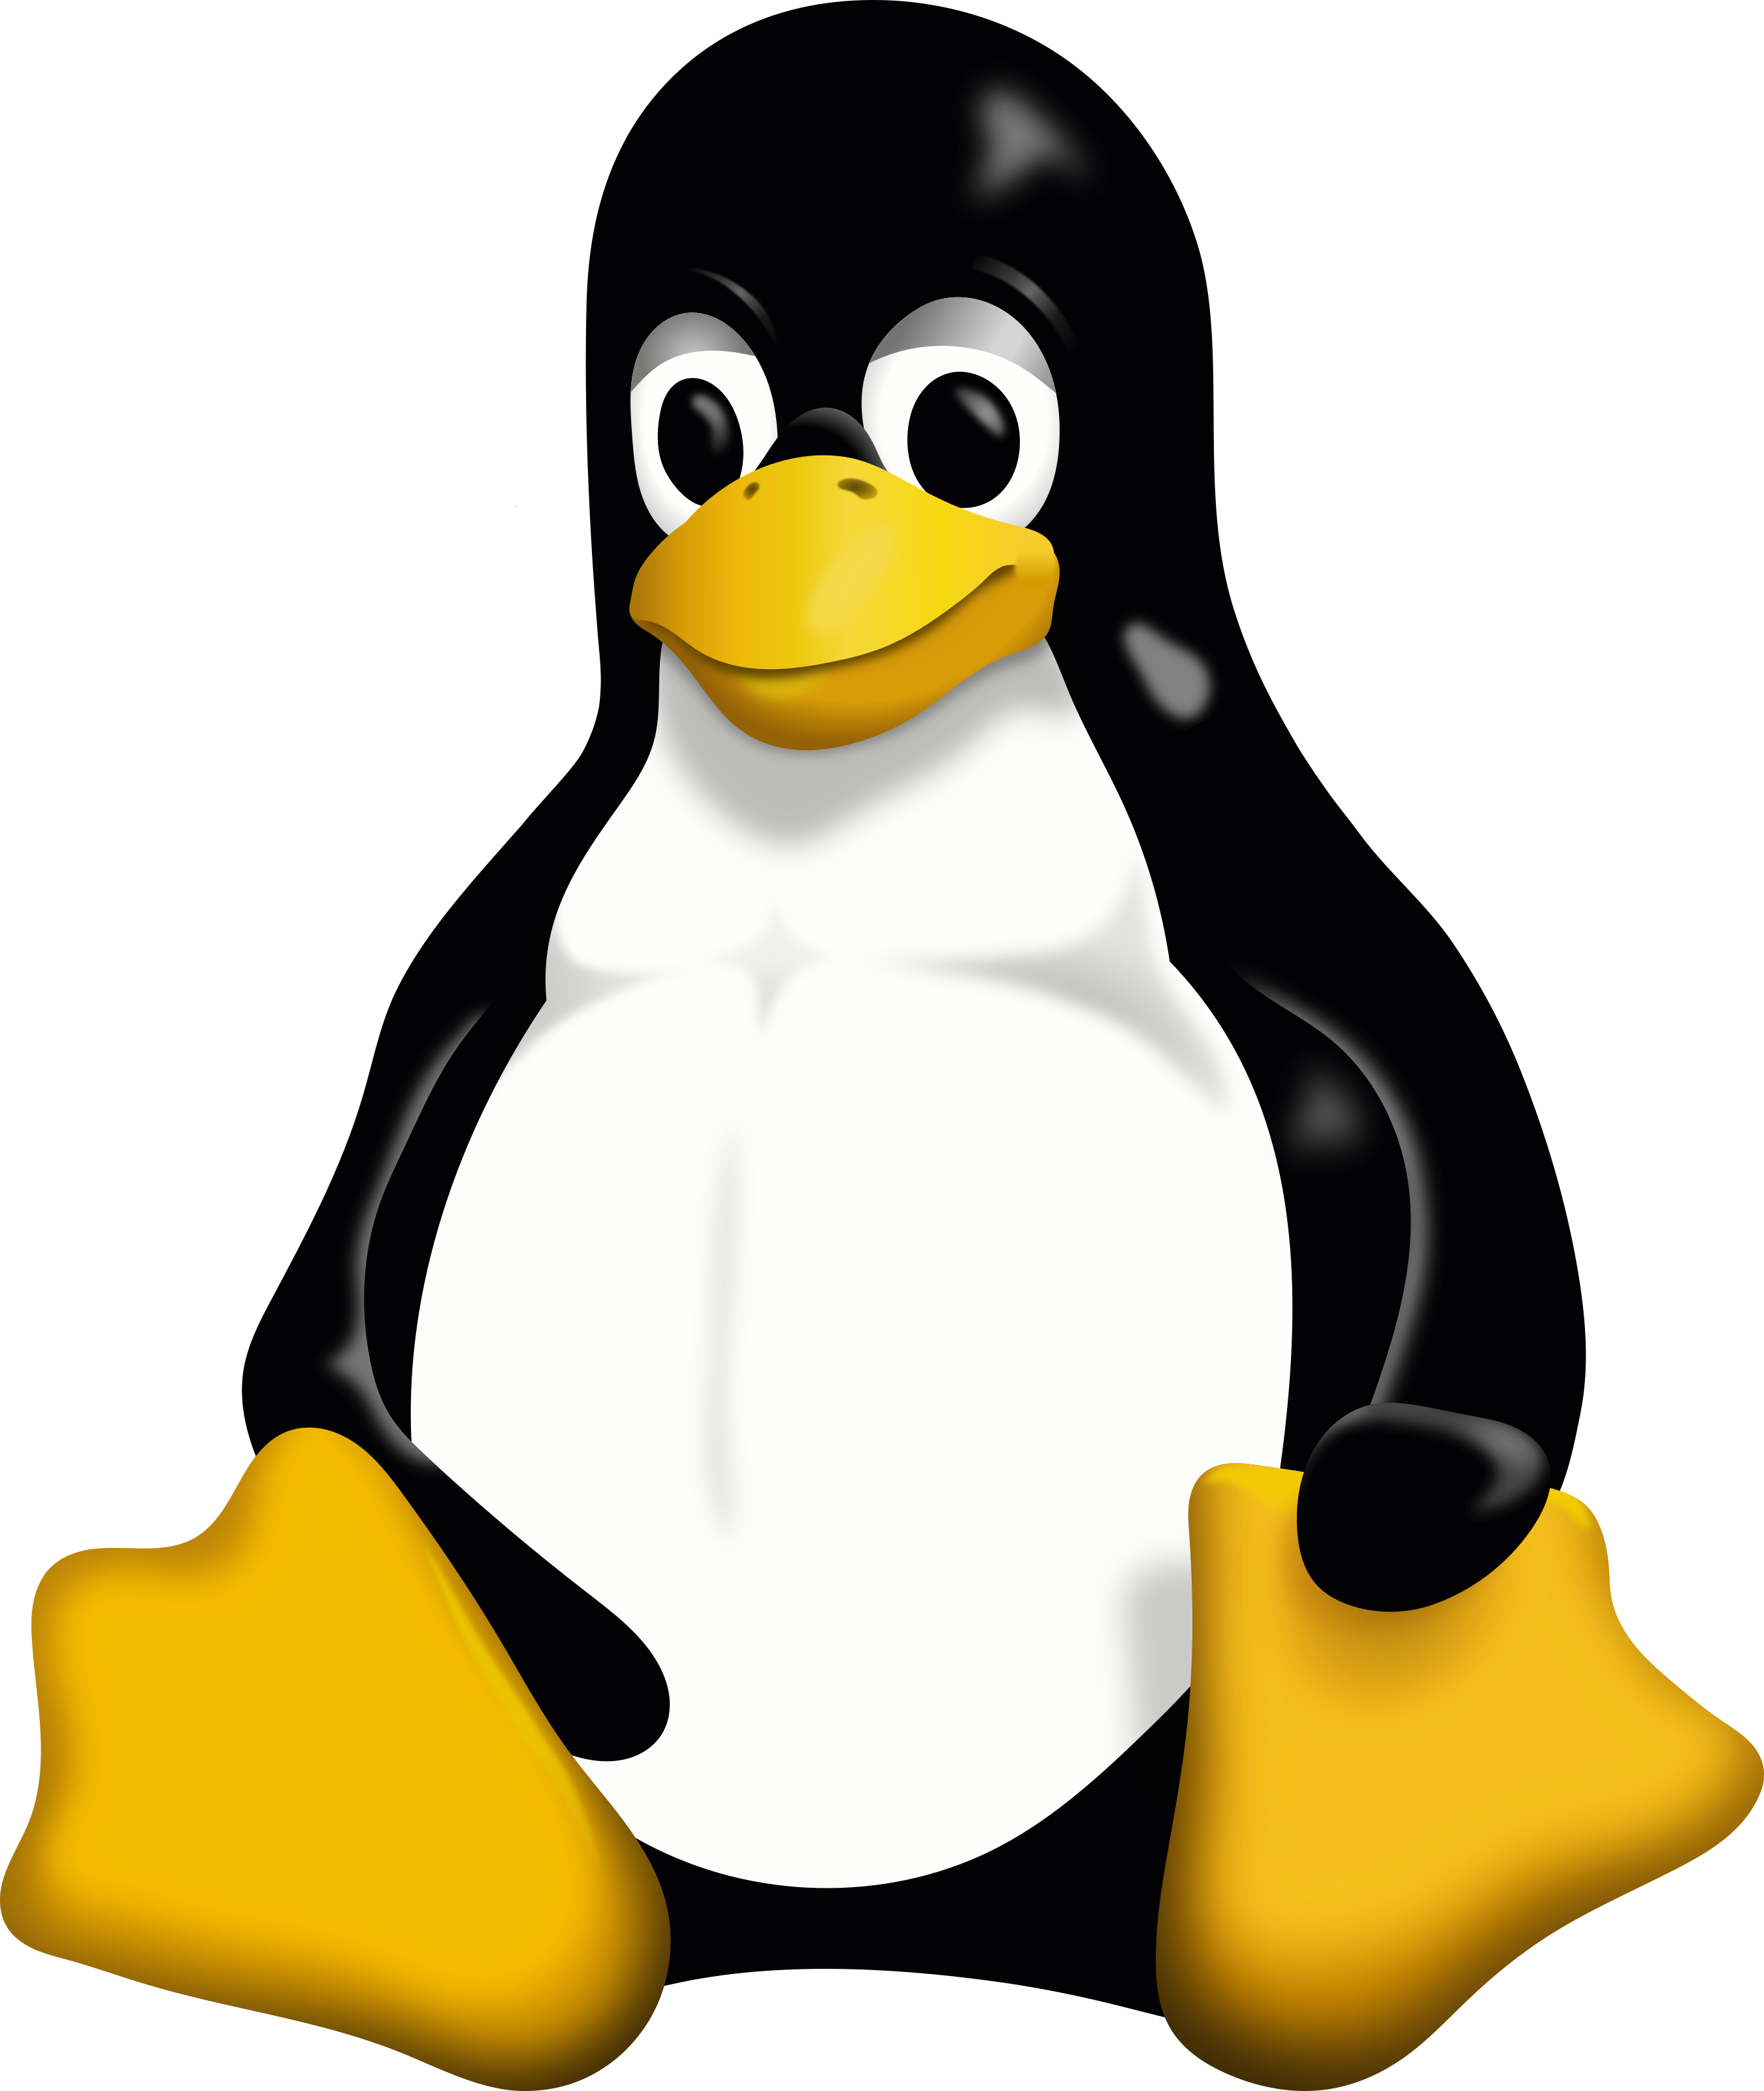

In [282]:
show_image(filename='results/error_prop/ecb/1mb_corrupted.png', width=200)

> Czy błąd w szyfrogramie będzie skutkował niemożnością odczytania po deszyfrowaniucałej wiadomości, fragmentu?

Odp: **Nie**

## CBC

In [283]:
iv = os.urandom(aes_block_size_in_bytes)
aes_cbc_cipher = Cipher(AES(key), CBC(iv))

In [284]:
msg = b'To jest testowa wiadomosc. Dalszy teskt. ABCDEFGHIJK'
pkcs7_unpadder = padding.PKCS7(aes_block_size_in_bits).padder()
padded_msg = pkcs7_unpadder.update(msg) + pkcs7_unpadder.finalize()
encrypted_msg = aes_cbc_cipher.encryptor().update(padded_msg)
print(encrypted_msg)

b'\x85\x9fx\xd1H\xc7\xa1\xe6\x13\x00\t.\xfb\xd6yhz\x15\x82\x18d\xe2^\x13\x7f\x96\x9e \xb0\xc4\xbf\xea\xb5\x91E<\x96\x93\xc4t;c\xb9@Y\x9d\xa4kK\x8d\xf5\xff\x96J\x9e/\xc0S\xe1\x03\x8e\xedZ\x97'


In [285]:
decrypted_msg = aes_cbc_cipher.decryptor().update(encrypted_msg)
print(decrypted_msg)

b'To jest testowa wiadomosc. Dalszy teskt. ABCDEFGHIJK\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c'


### Pomiar czasu szyfrowania CBC

In [286]:
cipherdata_1mb, cipherdata_5mb, cipherdata_10mb = measure_enc_time(lambda data: aes_cbc_cipher.encryptor().update(data))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:51<00:00,  1.02s/it]

For 1mb.png, mean = 0.0364s, var = 0.0000s, median = 0.0362s
For 5mb.png, mean = 0.2837s, var = 0.0001s, median = 0.2838s
For 10mb.png, mean = 0.7036s, var = 0.0004s, median = 0.7033s


### Pomiar czasu deszyfrowania CBC

In [287]:
measure_dec_time(lambda data: aes_cbc_cipher.decryptor().update(data), cipherdata_1mb, cipherdata_5mb, cipherdata_10mb)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:23<00:00,  2.10it/s]

For 1mb.png, mean = 0.0171s, var = 0.0000s, median = 0.0170s
For 5mb.png, mean = 0.1317s, var = 0.0000s, median = 0.1305s
For 10mb.png, mean = 0.3272s, var = 0.0001s, median = 0.3250s


### Błąd w szyfrogramie

In [324]:
cipherdata_1mb = aes_cbc_cipher.encryptor().update(im1mb_padded)
cipherdata_1mb_corrupted = corrupt_cipherdata(cipherdata_1mb, 10)
assert cipherdata_1mb != cipherdata_1mb_corrupted

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


In [325]:
if not os.path.isdir('results/error_prop/cbc'):
    os.mkdir('results/error_prop/cbc')

In [334]:
decrypted_1b_corrupted = decrypt_image(cipherdata_1mb_corrupted, lambda data: aes_cbc_cipher.decryptor().update(data))
save_img('results/error_prop/cbc/1mb_corrupted.png', decrypted_1b_corrupted)

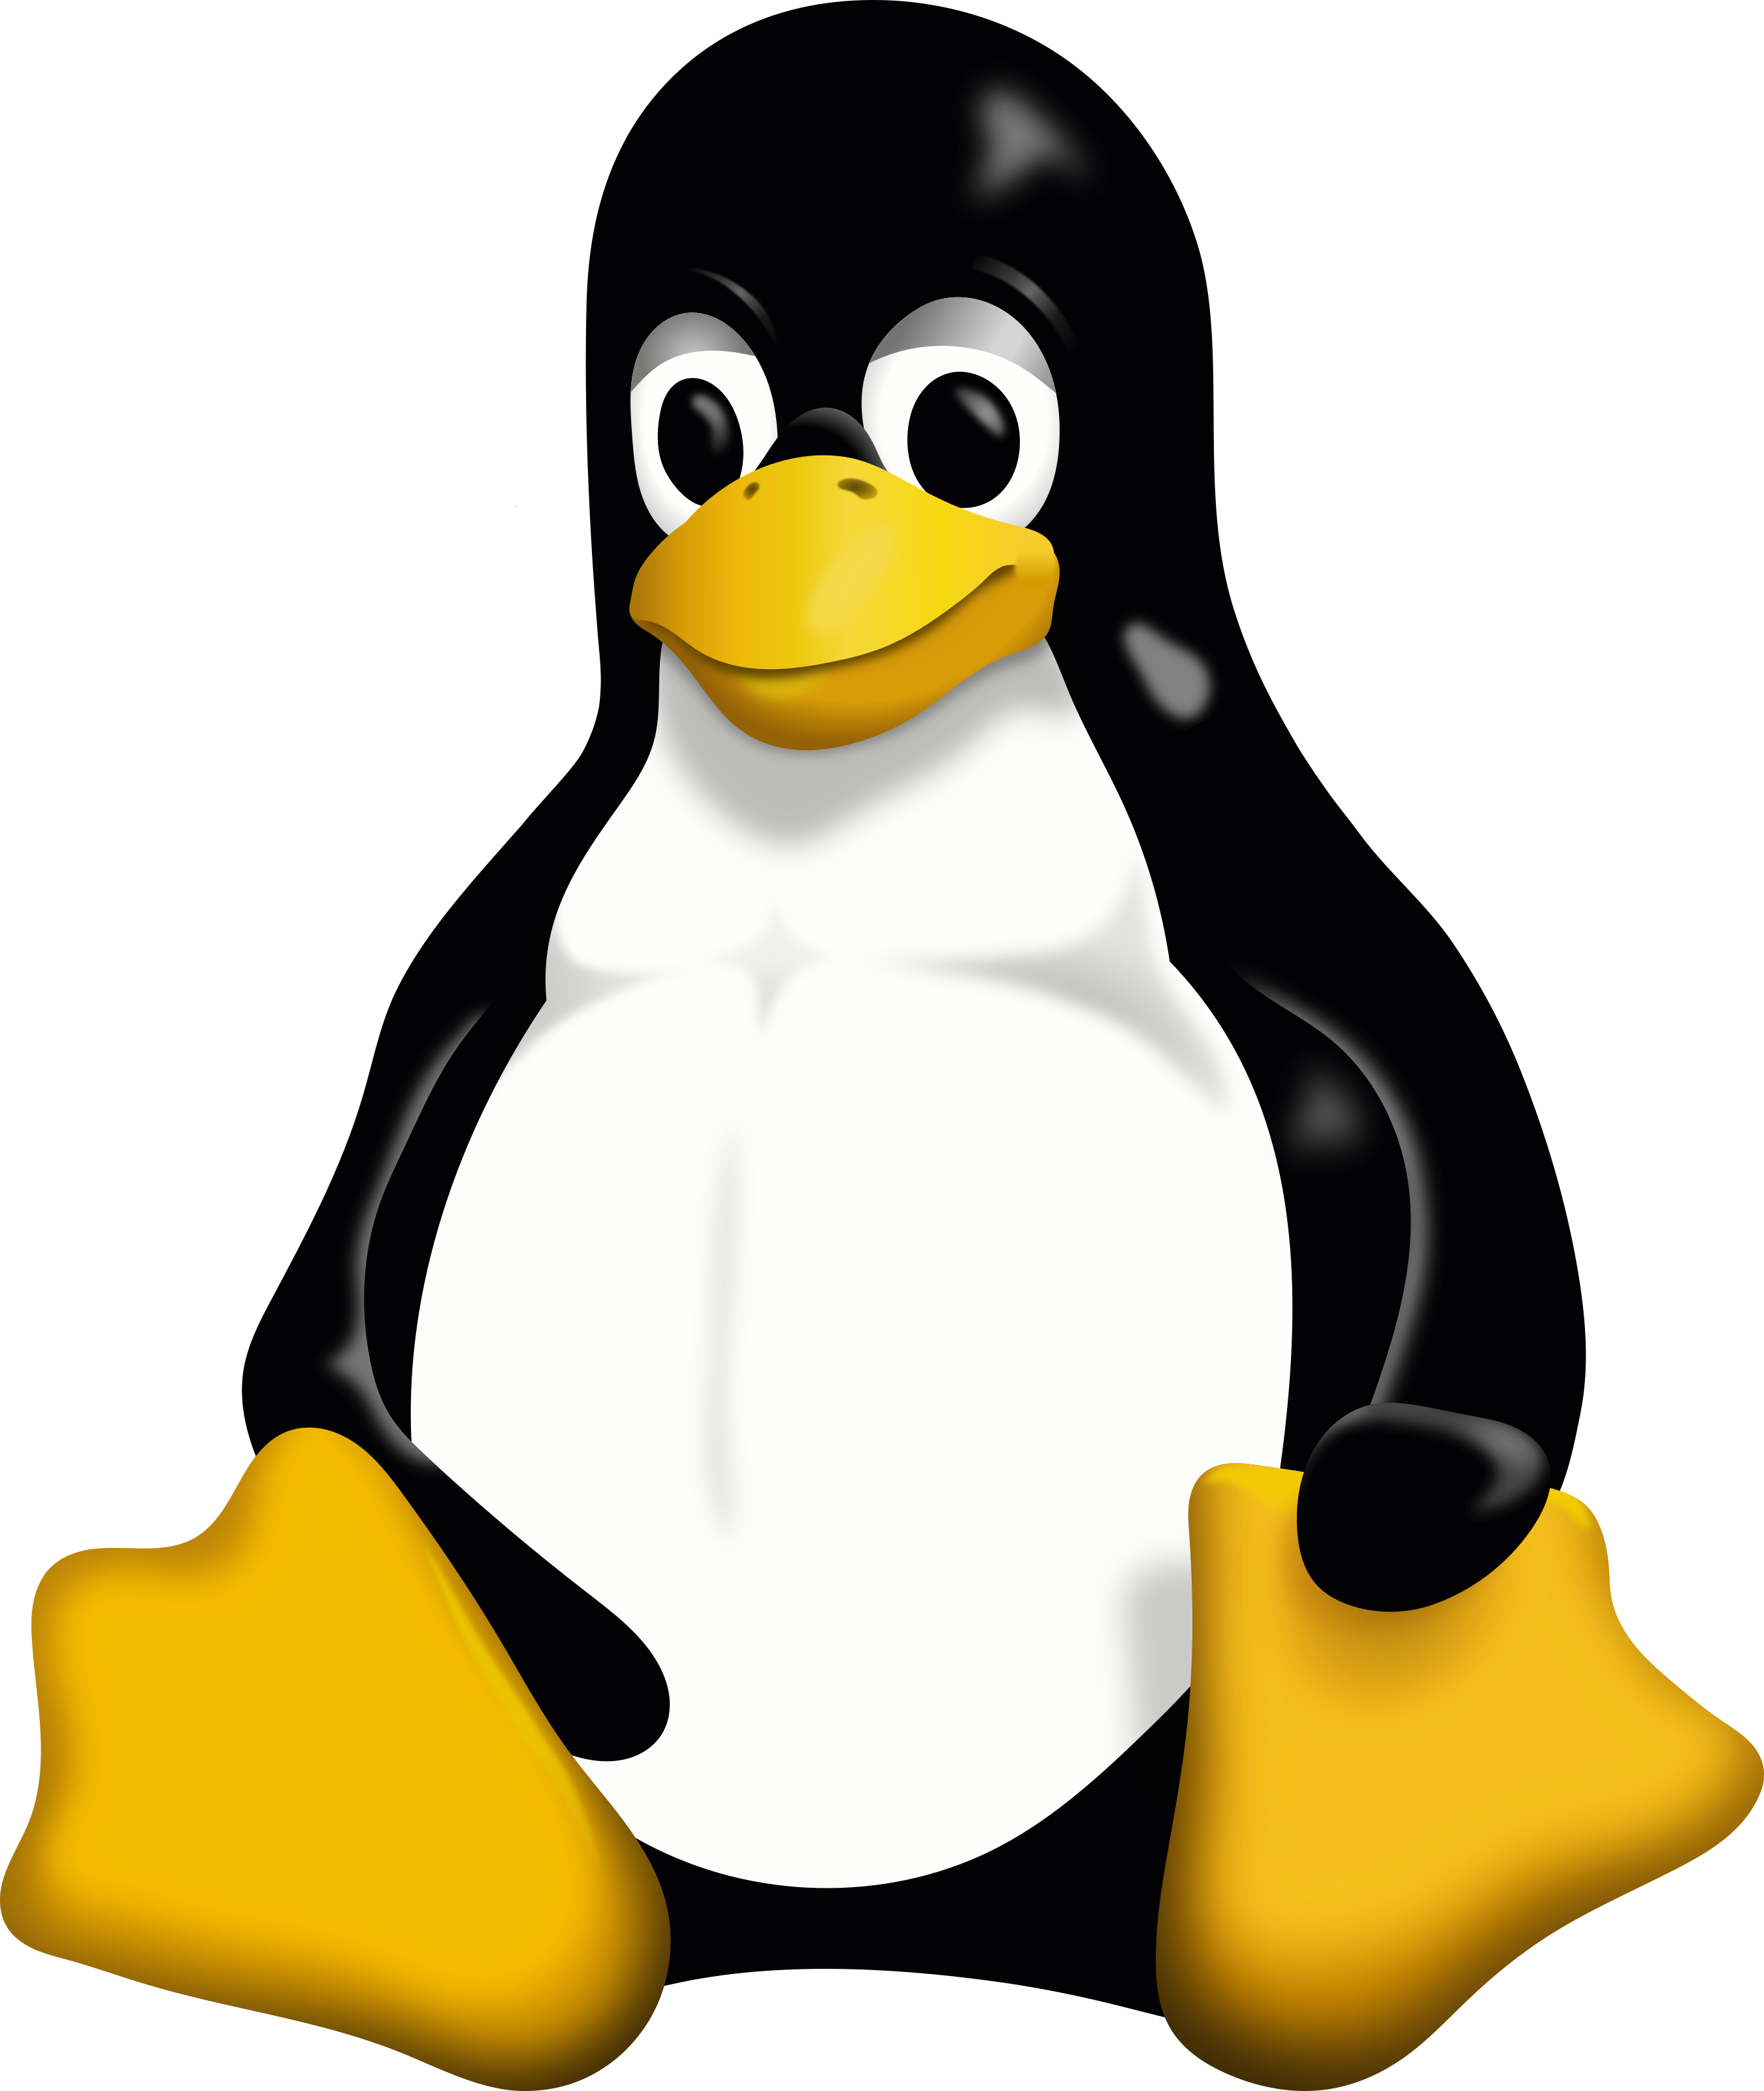

In [335]:
show_image(filename='results/error_prop/ecb/1mb_corrupted.png', width=200)

## Moja implementacja CBC

In [179]:
def xor_bytes(bytes1, bytes2):
    return bytes([a ^ b for a, b in zip(bytes1, bytes2)])

In [232]:
def encrypt_cbc(aes_ecb_cipher, iv, data):
    num_of_blocks = len(data) // aes_block_size_in_bytes
    last_cipherdata = copy.copy(iv)
    encrypted_data = bytearray(num_of_blocks * aes_block_size_in_bytes)
    
    for block_id in tqdm(range(num_of_blocks)):
        start = block_id * aes_block_size_in_bytes
        stop = start + aes_block_size_in_bytes
        
        block_to_cipher = data[start:stop]
        data_to_cipher = xor_bytes(block_to_cipher, last_cipherdata)
        
        enc_block = aes_ecb_cipher.encryptor().update(data_to_cipher)
        encrypted_data[start:stop] = enc_block
        last_cipherdata = enc_block
        
    return bytes(encrypted_data)

In [233]:
def decrypt_cbc(aes_ecb_cipher, iv, data):
    num_of_blocks = len(data) // aes_block_size_in_bytes
    decrypted_data = bytearray(num_of_blocks * aes_block_size_in_bytes)
    
    for block_id in tqdm(range(num_of_blocks - 1, 0, -1)):
        curr_block_start = block_id * aes_block_size_in_bytes
        curr_block_stop = curr_block_start + aes_block_size_in_bytes
        
        prev_block_start = (block_id - 1) * aes_block_size_in_bytes
        prev_block_end = prev_block_start + aes_block_size_in_bytes
        
        curr_block = data[curr_block_start:curr_block_stop]
        prev_block = data[prev_block_start:prev_block_end]

        dec_curr_block = aes_ecb_cipher.decryptor().update(curr_block)
        decrypted_data[curr_block_start:curr_block_stop] = xor_bytes(dec_curr_block, prev_block)

    first_dec_block = aes_ecb_cipher.decryptor().update(data[0:aes_block_size_in_bytes])
    decrypted_data[0:aes_block_size_in_bytes] = xor_bytes(first_dec_block, iv)
    
    return bytes(decrypted_data)

In [234]:
msg = b'Test szyfrowania CBC. Dalsza tresc wiadomosci. ABCDEFG'
pkcs7_unpadder = padding.PKCS7(aes_block_size_in_bits).padder()
padded_msg = pkcs7_unpadder.update(msg) + pkcs7_unpadder.finalize()
print(len(padded_msg), len(padded_msg) * 8)
print(padded_msg)

64 512
b'Test szyfrowania CBC. Dalsza tresc wiadomosci. ABCDEFG\n\n\n\n\n\n\n\n\n\n'


In [235]:
res = encrypt_cbc(aes_ecb_cipher, iv, padded_msg)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


In [236]:
dec_res = decrypt_cbc(aes_ecb_cipher, iv, res)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


In [237]:
dec_res

b'Test szyfrowania CBC. Dalsza tresc wiadomosci. ABCDEFG\n\n\n\n\n\n\n\n\n\n'

### Pomiar czasu szyfrowania mojej implementacji CBC

In [238]:
start = time.time()
cipherdata_1mb = encrypt_cbc(aes_ecb_cipher, iv, im1mb_padded)
stop = time.time()
enc_1mb_time = stop - start
print(f"Encryption time of my CBC on 1mb.png is {enc_1mb_time:.2f}s")

100%|████████████████████████████████████████████████████████████████████| 2160001/2160001 [00:16<00:00, 132875.62it/s]

Encryption time of my CBC on 1mb.png is 16.27s


In [239]:
encrypted_img_data = np.frombuffer(cipherdata_1mb, dtype=np.uint8)[:img_data.size].reshape(img_data.shape)

if not os.path.isdir("results/cbc"):
    os.mkdir("results/cbc")

encrypted_img = Image.fromarray(encrypted_img_data, 'RGBA')
encrypted_img.save('results/cbc/1mb.png')

In [240]:
start = time.time()
cipherdata_5mb = encrypt_cbc(aes_ecb_cipher, iv, im5mb_padded)
stop = time.time()
enc_5mb_time = stop - start
print(f"Encryption time of my CBC on 5mb.png is {enc_5mb_time:.2f}s")

100%|██████████████████████████████████████████████████████████████████| 17113301/17113301 [02:09<00:00, 131824.51it/s]


Encryption time of my CBC on 5mb.png is 129.93s


In [241]:
start = time.time()
cipherdata_10mb = encrypt_cbc(aes_ecb_cipher, iv, im10mb_padded)
stop = time.time()
enc_10mb_time = stop - start
print(f"Encryption time of my CBC on 10mb.png is {enc_10mb_time:.2f}s")

100%|██████████████████████████████████████████████████████████████████| 42666001/42666001 [05:25<00:00, 131278.06it/s]


Encryption time of my CBC on 10mb.png is 325.31s


### Pomiar czasu deszyfrowania mojej implementacji CBC

In [242]:
start = time.time()
image_data_1mb = decrypt_cbc(aes_ecb_cipher, iv, cipherdata_1mb)
stop = time.time()
dec_1mb_time = stop - start
print(f"Decryption time of my CBC on 1mb.png is {dec_1mb_time:.2f}s")

100%|████████████████████████████████████████████████████████████████████| 2160000/2160000 [00:16<00:00, 129042.09it/s]

Decryption time of my CBC on 1mb.png is 16.76s


In [243]:
start = time.time()
image_data_5mb = decrypt_cbc(aes_ecb_cipher, iv, cipherdata_5mb)
stop = time.time()
dec_5mb_time = stop - start
print(f"Decryption time of my CBC on 5mb.png is {dec_5mb_time:.2f}s")

100%|██████████████████████████████████████████████████████████████████| 17113300/17113300 [02:06<00:00, 135448.30it/s]

Decryption time of my CBC on 5mb.png is 126.46s


In [244]:
start = time.time()
image_data_10mb = decrypt_cbc(aes_ecb_cipher, iv, cipherdata_10mb)
stop = time.time()
dec_10mb_time = stop - start
print(f"Decryption time of my CBC on 10mb.png is {dec_10mb_time:.2f}s")

100%|██████████████████████████████████████████████████████████████████| 42666000/42666000 [05:17<00:00, 134580.66it/s]


Decryption time of my CBC on 10mb.png is 317.30s


### Błąd w szyfrogramie używając moją implementację CBC

In [348]:
cipherdata_1mb = encrypt_cbc(aes_ecb_cipher, iv, im1mb_padded)
cipherdata_1mb_corrupted = corrupt_cipherdata(cipherdata_1mb, 10)
assert cipherdata_1mb != cipherdata_1mb_corrupted

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


In [349]:
if not os.path.isdir('results/error_prop/moj_cbc'):
    os.mkdir('results/error_prop/moj_cbc')

In [350]:
decrypted_1b_corrupted = decrypt_image(cipherdata_1mb_corrupted, lambda data: decrypt_cbc(aes_ecb_cipher, iv, data))
save_img('results/error_prop/moj_cbc/1mb_corrupted.png', decrypted_1b_corrupted)

100%|████████████████████████████████████████████████████████████████████| 2160000/2160000 [00:15<00:00, 135353.33it/s]


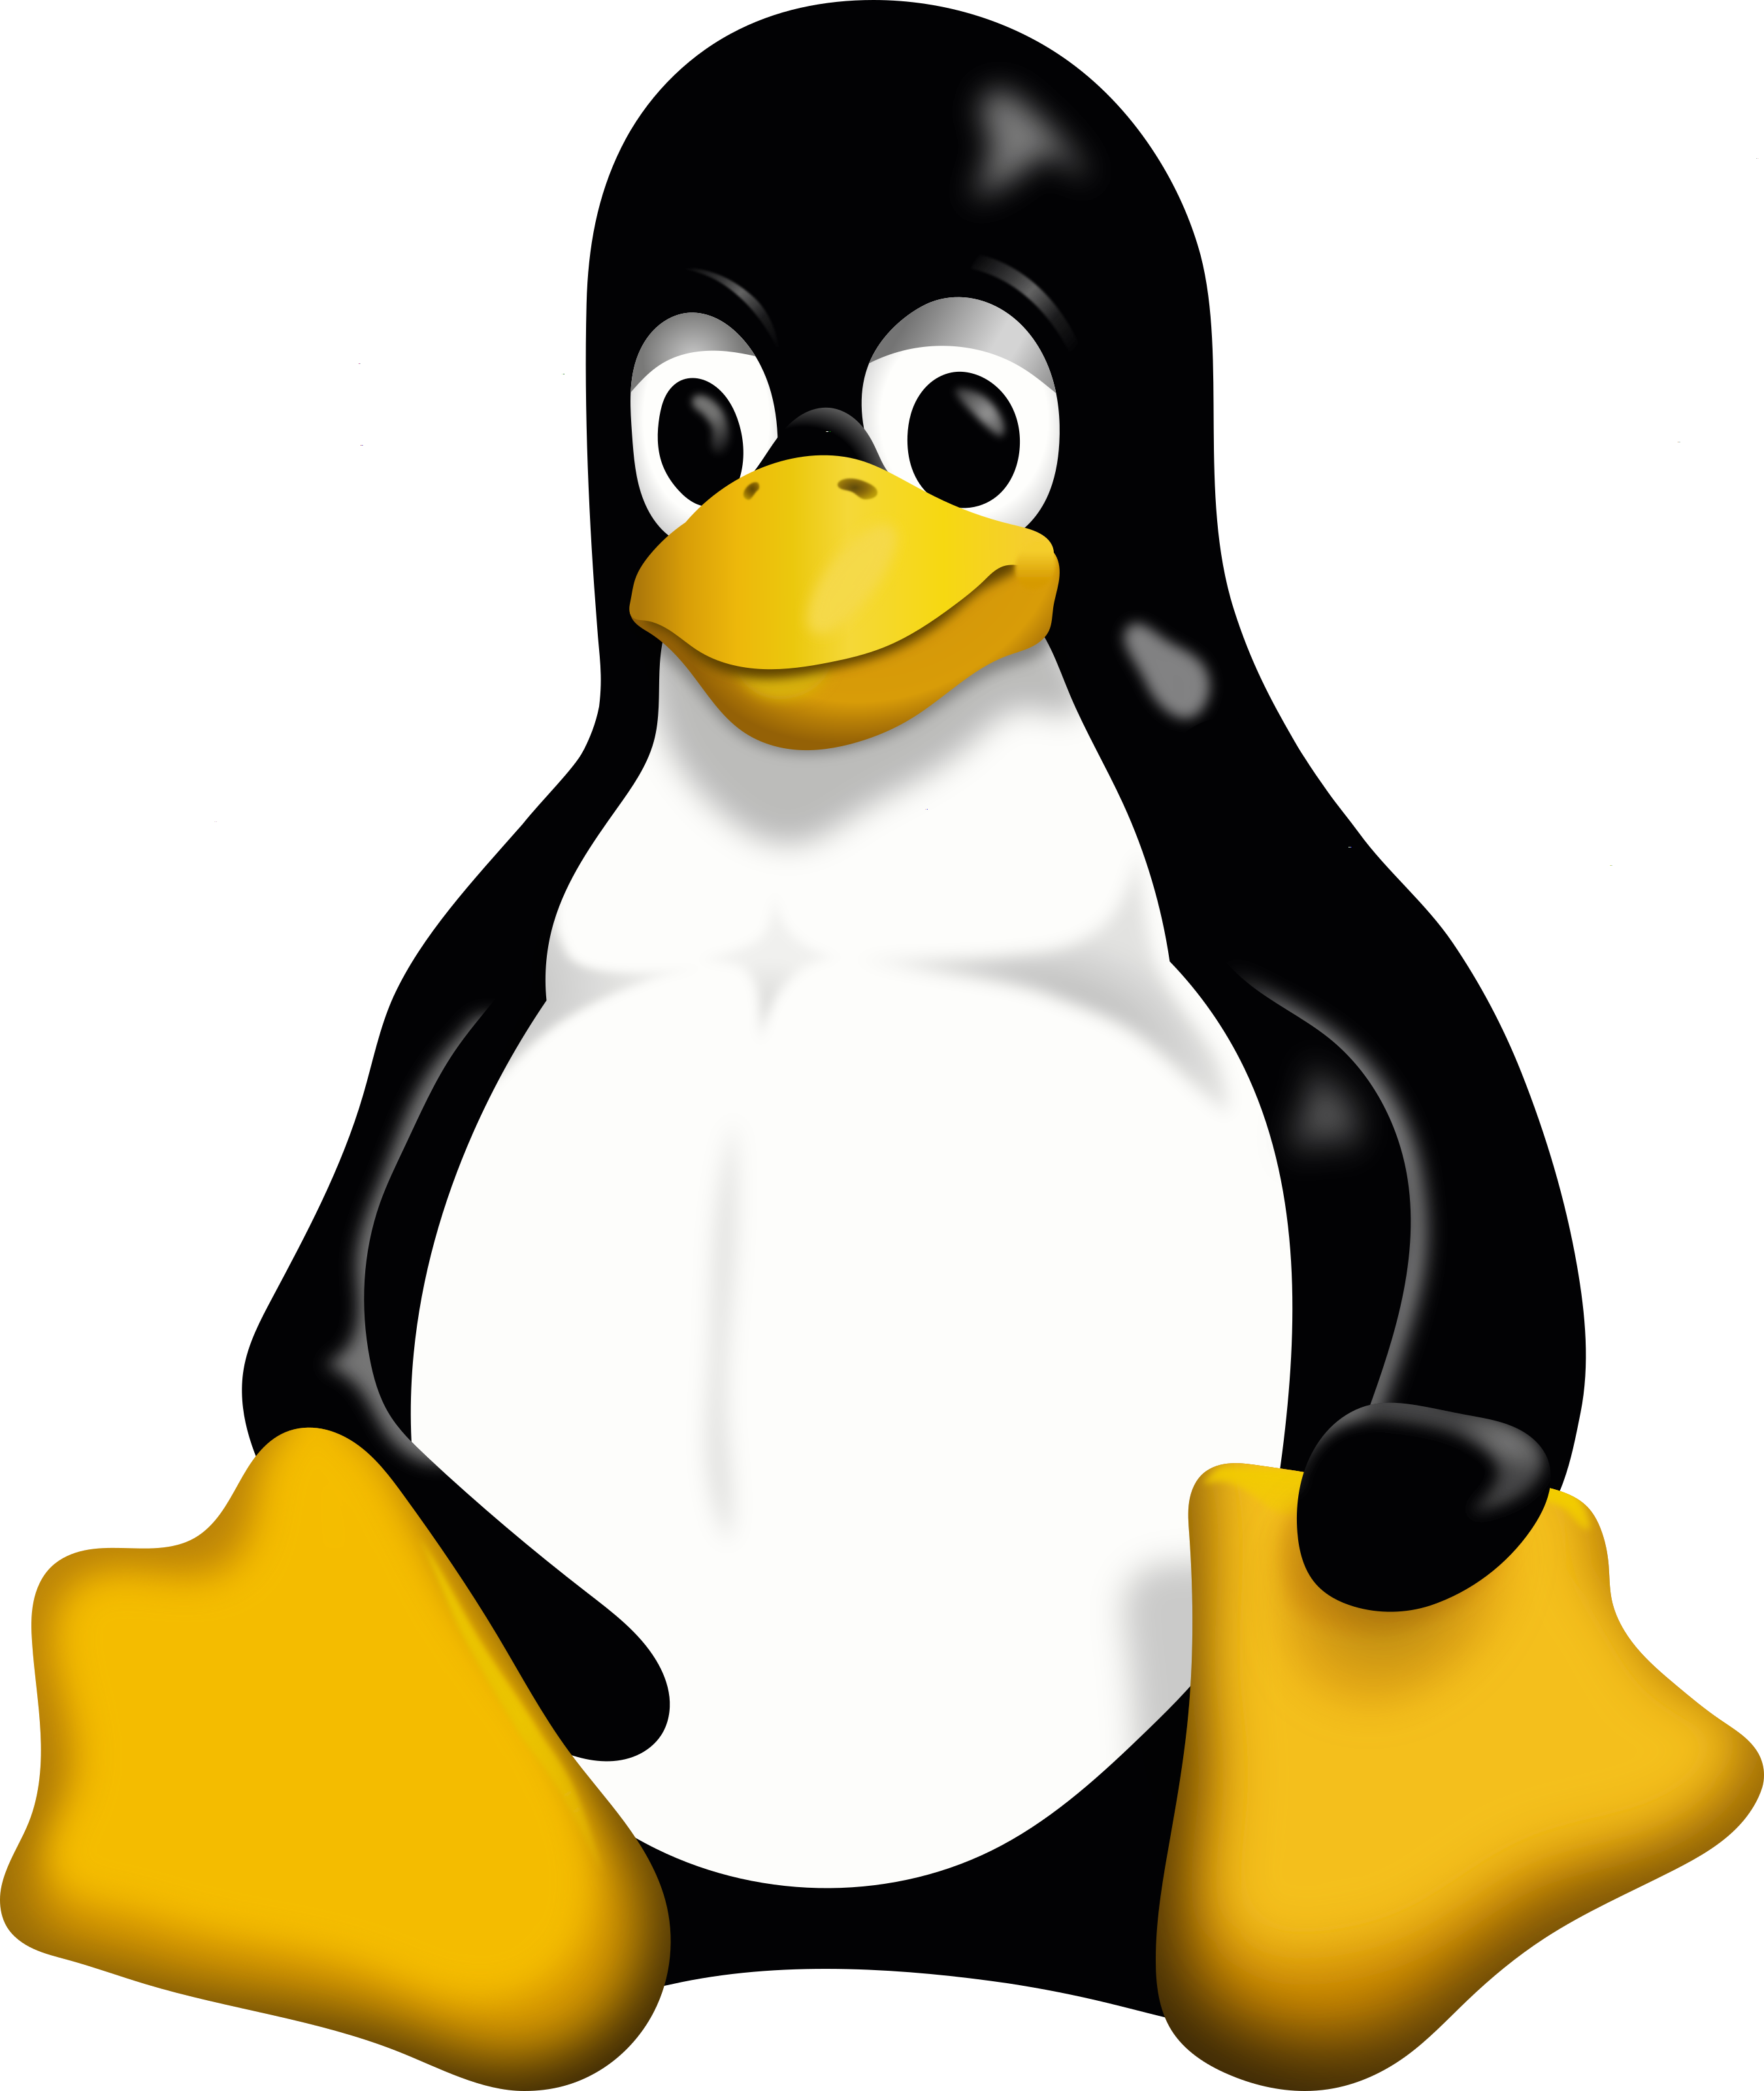

In [352]:
show_image(filename='results/error_prop/moj_cbc/1mb_corrupted.png', width=200)

## CTR

In [336]:
iv = os.urandom(aes_block_size_in_bytes)
aes_ctr_cipher = Cipher(AES(key), CTR(iv))

### Pomiar czasu szyfrowania ECB

In [337]:
cipherdata_1mb, cipherdata_5mb, cipherdata_10mb = measure_enc_time(lambda data: aes_ctr_cipher.encryptor().update(data))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:23<00:00,  2.11it/s]

For 1mb.png, mean = 0.0173s, var = 0.0000s, median = 0.0170s
For 5mb.png, mean = 0.1317s, var = 0.0001s, median = 0.1291s
For 10mb.png, mean = 0.3233s, var = 0.0000s, median = 0.3220s


### Pomiar czasu deszyfrowania ECB

In [338]:
measure_dec_time(lambda data: aes_ctr_cipher.decryptor().update(data), cipherdata_1mb, cipherdata_5mb, cipherdata_10mb)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:23<00:00,  2.11it/s]

For 1mb.png, mean = 0.0172s, var = 0.0000s, median = 0.0170s
For 5mb.png, mean = 0.1314s, var = 0.0000s, median = 0.1297s
For 10mb.png, mean = 0.3244s, var = 0.0002s, median = 0.3216s


### Błąd w szyfrogramie

In [343]:
cipherdata_1mb = aes_ctr_cipher.encryptor().update(im1mb_padded)
cipherdata_1mb_corrupted = corrupt_cipherdata(cipherdata_1mb, 10)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


In [344]:
if not os.path.isdir('results/error_prop/ctr'):
    os.mkdir('results/error_prop/ctr')

In [345]:
decrypted_1b_corrupted = decrypt_image(cipherdata_1mb_corrupted, lambda data: aes_ctr_cipher.decryptor().update(data))
save_img('results/error_prop/ctr/1mb_corrupted.png', decrypted_1b_corrupted)

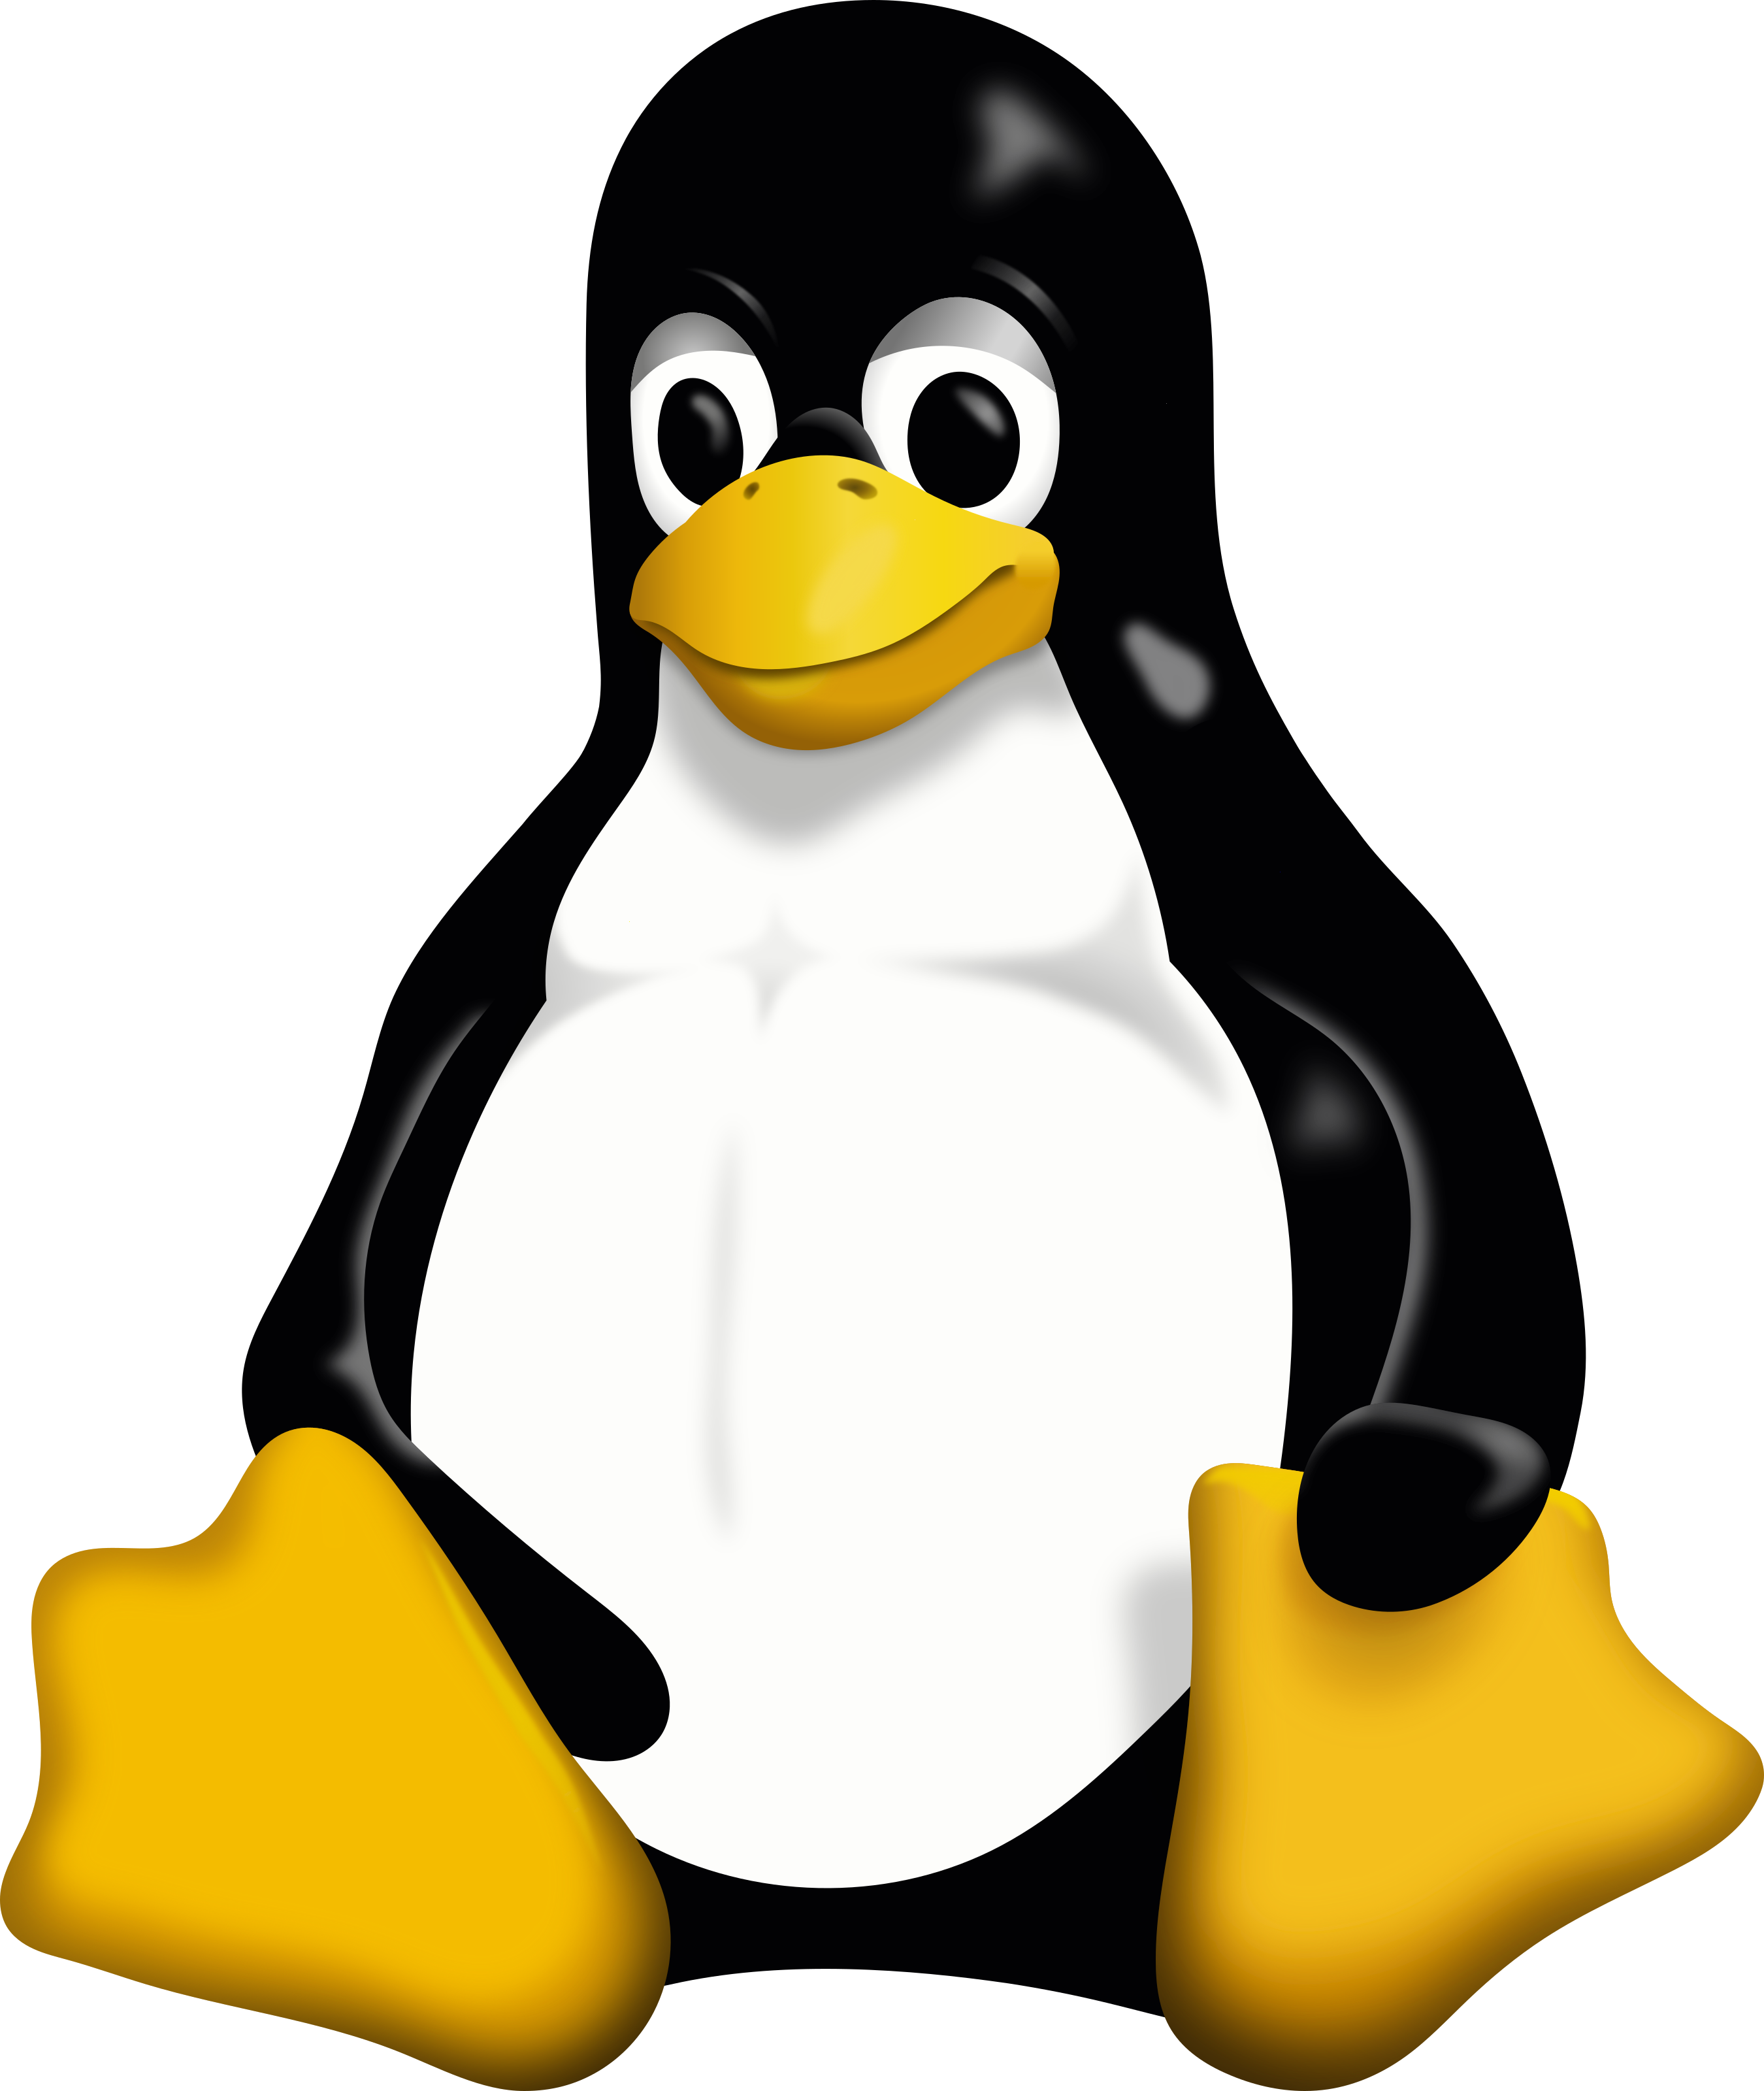

In [346]:
show_image(filename='results/error_prop/ctr/1mb_corrupted.png', width=200)